In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pycountry_convert as pc

# Loading Data

## Gross Domestic Product

In [2]:
#countries income group
df_gdp_group = pd.read_csv('data/gdp_group.csv', delimiter =';')
df_gdp_group = df_gdp_group[['TableName', 'IncomeGroup']]
df_gdp_group.columns = ['pais', 'IncomeGroup']

#gdp percapita
df_gdp_pc = pd.read_csv('data/gdp_percapita.csv', delimiter =';', dtype={'2018': np.float32})
df_gdp_pc.columns = ['pais', 'gdp_pc']

#gdp
df_gdp = pd.read_csv('data/gdp_values.csv', delimiter =';', dtype={'2018': np.float32})
df_gdp.columns = ['pais', 'gdp']

## Flights Percent Loss

In [3]:
df_pct_loss = pd.read_csv('data/flights_pct_loss_week5-22.csv')

In [4]:
df_pct_loss = df_pct_loss[(df_pct_loss.valor_semana >=15) & (df_pct_loss.valor_semana <= 22)]

In [5]:
df_pct_loss = df_pct_loss[['pais', 'pct_loss']].groupby('pais').mean().reset_index()

In [6]:
df_pct_loss[df_pct_loss.pais =='Brazil']

,pais,pct_loss
11,Brazil,0.848348


In [7]:
len(df_pct_loss.pais.unique())

71

## Economic Impact

In [8]:
df_eco_impct = pd.read_csv('data/all_variables_response_economic_countries.csv')
df_eco_impct = df_eco_impct[['Country', 'Output-CLI percent impact']]
df_eco_impct.columns = ['pais', 'Output-CLI percent impact']

## Population

In [9]:
df_pop = pd.read_csv('data/socio_stats_countries.csv')

df_pop = df_pop[df_pop.variable == 'Population']
df_pop = df_pop[['Name', 'value']]
df_pop.columns = ['pais', 'pop']

## Export Goods and Services

In [10]:
df_goods_serv = pd.read_csv('data/export_goods_serv.csv', delimiter =';', dtype={'2018': np.float32}, encoding='cp1252')
df_goods_serv.columns = ['pais', 'value_goods_serv']

## Covid Deaths

In [11]:
df_covid = pd.read_csv('data/total_cases_countries_normalized.csv')
df_covid = df_covid[df_covid.Date == '2020-03-31']
df_covid = df_covid[['Name', 'TotalDeaths']]
df_covid.columns = ['pais', 'TotalDeaths31/03']

# 1st  Occurrence of Covid

In [12]:
covid = pd.read_csv('data/total_cases_countries_normalized.csv')

In [13]:
first_date = []

for pais in covid.Name.unique():
    auxdf = covid[covid.Name == pais]
    auxdf = auxdf[auxdf.TotalDeaths != 0]
    if not(auxdf.empty):
        fd = auxdf.iloc[0].Day
    first_date.append([pais, fd])
df_first_date = pd.DataFrame(first_date, columns = ['pais', '1stDay' ])

## Eigenvector Centrality

In [14]:
df_eigenvec = pd.read_csv('data/eigenvector_centrality.csv')
df_eigenvec.columns = ['pais', 'centrality']

## Target Probabilty

In [15]:
df_target_prob = pd.read_csv('data/probability_matrix.csv')
df_target_prob = df_target_prob[['target', 'prob']].groupby('target').mean().reset_index()

In [16]:
df_target_prob.columns = ['pais', 'prob_target']

## Merging DataFrames

In [17]:
df = df_pct_loss.merge(df_gdp_group, 'left', on = 'pais')
df = df.merge(df_gdp, 'left', on = 'pais')
df = df.merge(df_gdp_pc, 'left', on = 'pais')
df = df.merge(df_eco_impct, 'left', on = 'pais')
df = df.merge(df_pop, 'left', on = 'pais')
df = df.merge(df_goods_serv, 'left', on = 'pais')
df = df.merge(df_covid, 'left', on = 'pais')
df = df.merge(df_first_date, 'left', on = 'pais')
df = df.merge(df_eigenvec, 'left', on = 'pais')
df = df.merge(df_target_prob, 'left', on = 'pais')

## Getting Continent Column

In [18]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['continent'] = df['pais'].apply(lambda x: country_to_continent(x))

In [19]:
df

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths31/03,1stDay,centrality,prob_target,continent
0,Algeria,0.907910,Upper middle income,1.740000e+11,4.114715e+09,NaN,42228429.0,NaN,35.0,73.0,0.084755,0.004530,Africa
1,Argentina,0.907540,Upper middle income,5.200000e+11,1.168395e+09,NaN,44494502.0,7.680732e+10,24.0,68.0,0.085773,0.021742,South America
2,Armenia,0.903259,Upper middle income,1.243309e+10,4.212071e+09,NaN,2951776.0,4.700349e+09,3.0,87.0,0.035566,0.000456,Asia
3,Australia,0.595010,High income,1.430000e+12,5.737369e+09,3.599705,24982688.0,3.273090e+11,19.0,61.0,0.109007,0.035282,Oceania
4,Austria,0.858880,High income,4.550000e+11,5.146195e+09,4.747321,8840521.0,2.538070e+11,108.0,73.0,0.133552,0.016714,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Turkey,0.862534,Upper middle income,7.710000e+11,9.370177e+09,9.420315,82319724.0,2.379320e+11,168.0,79.0,0.134801,0.026778,Asia
67,Ukraine,0.884646,Lower middle income,1.310000e+11,3.095174e+09,NaN,44622516.0,5.913500e+10,11.0,79.0,0.106537,0.007970,Europe
68,United Arab Emirates,0.840435,High income,4.140000e+11,4.300495e+09,NaN,9630959.0,NaN,5.0,82.0,0.136058,0.074255,Asia
69,United Kingdom,0.833206,High income,2.860000e+12,4.294390e+09,7.390182,66460344.0,8.757610e+11,2043.0,67.0,0.145363,0.101323,Europe


# Plots

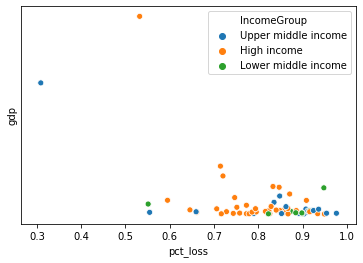

In [20]:
ax = sns.scatterplot(x="pct_loss", y="gdp", hue="IncomeGroup", data=df)
ax.set(yticks=[])
plt.show()

In [21]:
df.nlargest(10, 'gdp')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths31/03,1stDay,centrality,prob_target,continent
70,United States,0.532071,High income,2.050000e+13,6.279459e+09,1.749506,3.266875e+08,2.501310e+12,3170.0,61.0,0.145227,0.171243,North America
13,China,0.308714,Upper middle income,1.360000e+13,9.770847e+09,1.640852,1.392730e+09,2.651010e+12,3309.0,11.0,0.096098,0.004609,Asia
34,Japan,0.714520,High income,4.970000e+12,3.928996e+09,1.623814,1.265291e+08,9.293600e+11,56.0,44.0,0.116034,0.020682,Asia
24,Germany,0.720229,High income,3.950000e+12,4.760303e+09,5.248947,8.290578e+07,1.876900e+12,583.0,70.0,0.145200,0.080236,Europe
69,United Kingdom,0.833206,High income,2.860000e+12,4.294390e+09,7.390182,6.646034e+07,8.757610e+11,2043.0,67.0,0.145363,0.101323,Europe
22,France,0.847134,High income,2.780000e+12,4.146364e+09,6.520510,6.697711e+07,9.052890e+11,3024.0,46.0,0.145617,0.053842,Europe
29,India,0.948125,Lower middle income,2.720000e+12,2.009979e+09,4.652658,1.352617e+09,5.370420e+11,32.0,73.0,0.130890,0.040967,Asia
33,Italy,0.870898,High income,2.080000e+12,3.448320e+07,4.068059,6.042176e+07,6.559120e+11,11591.0,54.0,0.142501,0.040350,Europe
11,Brazil,0.848348,Upper middle income,1.870000e+12,8.920762e+09,5.880663,2.094693e+08,2.749770e+11,159.0,78.0,0.107166,0.034008,South America
12,Canada,0.746740,High income,1.710000e+12,4.623299e+09,2.116261,3.705776e+07,5.504510e+11,89.0,70.0,0.131519,0.026760,North America


In [22]:
df.nsmallest(10, 'gdp')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths31/03,1stDay,centrality,prob_target,continent
7,Barbados,0.949394,High income,5.145000e+09,1.794928e+09,NaN,286641.0,NaN,0.0,97.0,0.035372,0.081896,North America
2,Armenia,0.903259,Upper middle income,1.243309e+10,4.212071e+09,NaN,2951776.0,4.700349e+09,3.0,87.0,0.035566,0.000456,Asia
40,Malta,0.867303,High income,1.455342e+10,3.009828e+09,NaN,484630.0,2.102934e+10,0.0,100.0,0.115190,0.002541,Europe
54,Senegal,0.822947,Lower middle income,2.412960e+10,1.521954e+09,NaN,15854360.0,5.287038e+09,0.0,93.0,0.096723,0.036341,Africa
28,Iceland,0.716513,High income,2.587847e+10,7.319112e+09,1.194950,352721.0,1.224252e+10,2.0,80.0,0.098409,0.003140,Europe
20,Estonia,0.779335,High income,3.073214e+10,2.326635e+09,-1.412185,1321977.0,2.281175e+10,3.0,86.0,0.096465,0.002950,Europe
36,Latvia,0.934167,High income,3.440923e+10,1.786062e+08,NaN,1927174.0,2.108244e+10,0.0,95.0,0.102359,0.008210,Europe
5,Bahrain,0.773246,High income,3.774620e+10,2.405076e+09,NaN,1569439.0,3.009734e+10,4.0,77.0,0.095976,0.010190,Asia
10,Bolivia,0.899377,Lower middle income,4.028765e+10,3.548590e+08,NaN,11353142.0,1.035339e+10,6.0,90.0,0.026674,0.007770,South America
55,Serbia,0.852539,Upper middle income,5.059729e+10,7.246732e+09,NaN,6982604.0,2.496695e+10,13.0,81.0,0.095028,0.006989,Europe


In [24]:
for c in df.columns:
    if c not in ['continent', 'pais', 'pct_loss', 'IncomeGroup']:
        print('Correlação pct_loss e {}: {}'.format(c,df[[c, 'pct_loss']].corr().values[0][1]))

Correlação pct_loss e gdp: -0.549205917302793
Correlação pct_loss e gdp_pc: -0.39449524466891345
Correlação pct_loss e Output-CLI percent impact: 0.2639928202723868
Correlação pct_loss e pop: -0.30924511248564923
Correlação pct_loss e value_goods_serv: -0.5438525522430406
Correlação pct_loss e TotalDeaths31/03: -0.06858924195868014
Correlação pct_loss e 1stDay: 0.2889185627186436
Correlação pct_loss e centrality: -0.2430220834210257
Correlação pct_loss e prob_target: -0.10609867399665322


In [25]:
df.pct_loss.mean()

0.8027872668909226

In [26]:
df.nlargest(10, 'pct_loss')

,pais,pct_loss,IncomeGroup,gdp,gdp_pc,Output-CLI percent impact,pop,value_goods_serv,TotalDeaths31/03,1stDay,centrality,prob_target,continent
19,Dominican Republic,0.976517,Upper middle income,8.555539e+10,8.050632e+09,NaN,1.062716e+07,2.019170e+10,42.0,81.0,0.038592,0.000779,North America
61,Sri Lanka,0.954189,Upper middle income,8.890077e+10,4.102481e+08,NaN,2.167000e+07,2.026379e+10,1.0,89.0,0.081582,0.002944,Asia
7,Barbados,0.949394,High income,5.145000e+09,1.794928e+09,NaN,2.866410e+05,NaN,0.0,97.0,0.035372,0.081896,North America
29,India,0.948125,Lower middle income,2.720000e+12,2.009979e+09,4.652658,1.352617e+09,5.370420e+11,32.0,73.0,0.130890,0.040967,Asia
65,Thailand,0.936293,Upper middle income,5.050000e+11,7.273563e+09,NaN,6.942852e+07,3.285820e+11,10.0,61.0,0.107106,0.025415,Asia
36,Latvia,0.934167,High income,3.440923e+10,1.786062e+08,NaN,1.927174e+06,2.108244e+10,0.0,95.0,0.102359,0.008210,Europe
58,South Africa,0.924688,Upper middle income,3.680000e+11,6.374028e+09,-0.537225,5.777962e+07,1.100680e+11,3.0,87.0,0.114750,0.030234,Africa
39,Malaysia,0.920697,Upper middle income,3.590000e+11,1.137323e+07,NaN,3.152858e+07,2.464690e+11,37.0,78.0,0.105052,0.043233,Asia
48,Portugal,0.916243,High income,2.410000e+11,2.340791e+09,8.163515,1.028382e+07,1.056780e+11,140.0,78.0,0.121284,0.020749,Europe
46,Philippines,0.915664,Lower middle income,3.310000e+11,3.102713e+09,NaN,1.066519e+08,9.039707e+10,88.0,33.0,0.105591,0.013855,Asia


(0.95, 1)

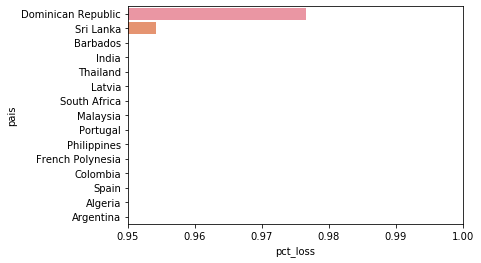

In [27]:
ax = sns.barplot(x = 'pct_loss', y = 'pais', data=df.nlargest(15, 'pct_loss'))
ax.set_xlim(0.95, 1)

(0.8, 1)

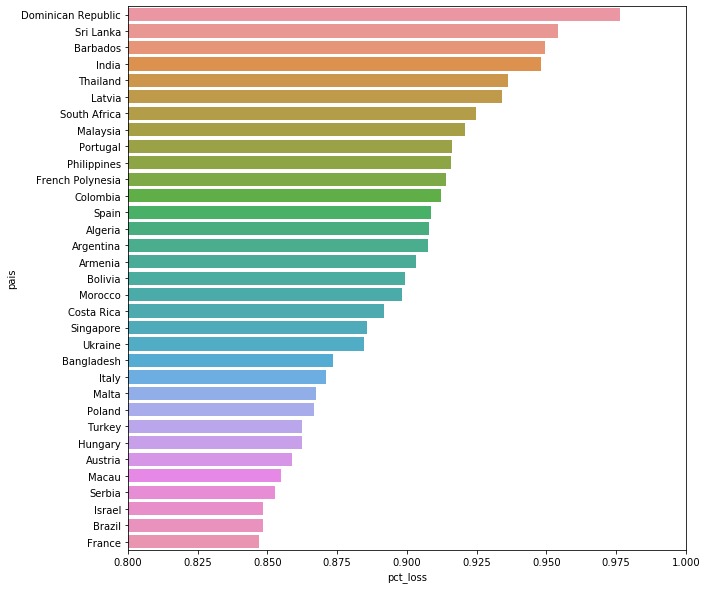

In [28]:
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = 'pct_loss', y = 'pais', data=df.nlargest(33, 'pct_loss'))
ax.set_xlim(0.8, 1)

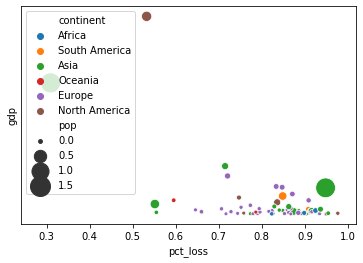

In [29]:
ax = sns.scatterplot(x="pct_loss", y="gdp", hue="continent", size='pop', sizes=(15, 400), data=df)
ax.set(yticks=[])
plt.show()

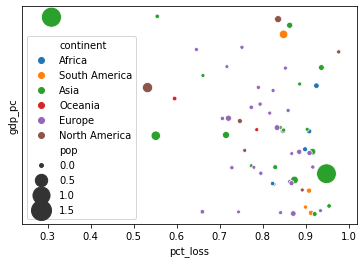

In [30]:
ax = sns.scatterplot(x="pct_loss", y="gdp_pc", hue="continent", size='pop', sizes=(15, 400), data=df)
ax.set(yticks=[])
plt.show()

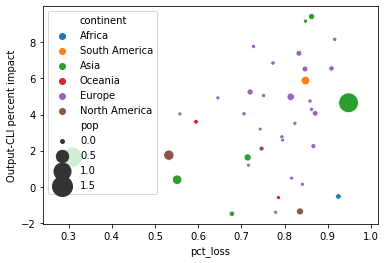

In [31]:
ax = sns.scatterplot(x="pct_loss", y="Output-CLI percent impact", hue="continent", size='pop', sizes=(15, 400), data=df)
plt.show()

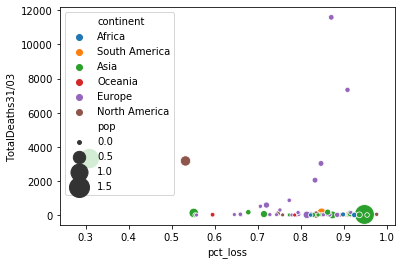

In [32]:
ax = sns.scatterplot(x="pct_loss", y="TotalDeaths31/03", hue="continent", size='pop', sizes=(15, 400), data=df)
plt.show()

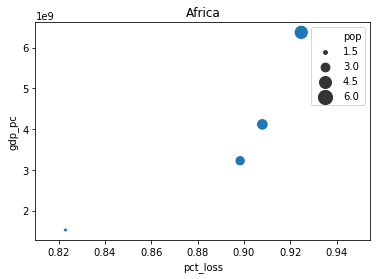

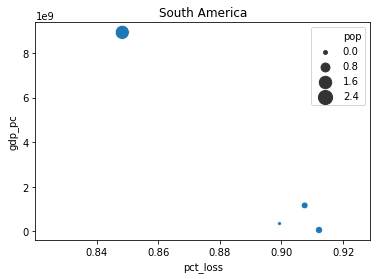

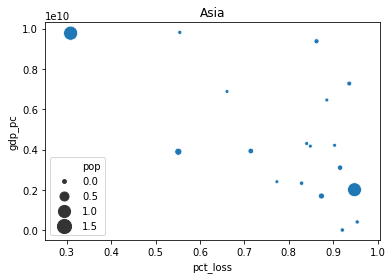

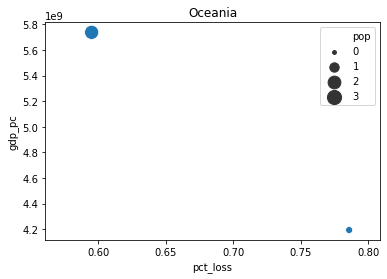

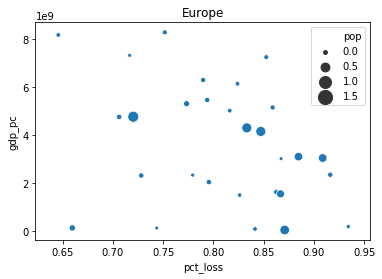

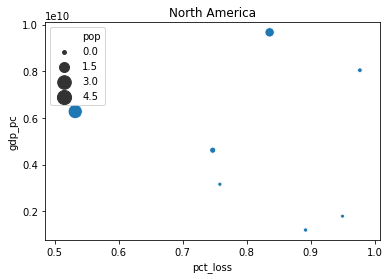

In [33]:
for c in df.continent.unique():
    aux_df = df[df.continent == c]
    ax = sns.scatterplot(x="pct_loss", y="gdp_pc", size='pop', sizes=(15, 200), data=aux_df)
    ax.set_title(c)
    plt.show()